<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch5_model_evaluation_and_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn==1.0.2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

## 5.1 교차 검증

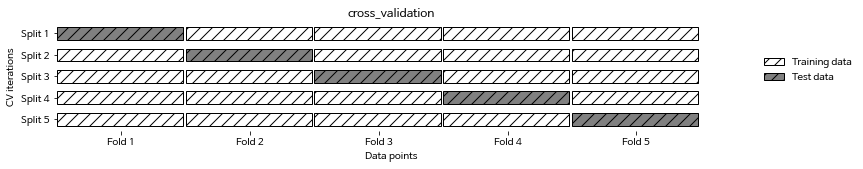

In [2]:
# 데이터를 여러 번 반복해 나누고 여러 모델을 학습

mglearn.plots.plot_cross_validation()

## 5.1.1 scikit-learn의 교차 검증

In [3]:
# iris 데이터 셋을 적용한 Logistic Regression 모델 평가하기

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
# cv 매개변수로 폴드의 수 바꾸기
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
# 교차 검증 평균 점수
print("교차 검증 평균 점수 : {:.2f}" .format(scores.mean()))

교차 검증 평균 점수 : 0.97


In [6]:
# cross_validate : 훈련과 테스트에 걸린 시간을 딕셔너리로 반환
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score = True)
res

{'fit_time': array([0.04453659, 0.05053473, 0.03839016, 0.04193306, 0.04158235]),
 'score_time': array([0.00063396, 0.00067353, 0.00088167, 0.00068712, 0.00065565]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.044537,0.000634,0.966667,0.966667
1,0.050535,0.000674,1.000000,0.966667
2,0.038390,0.000882,0.933333,0.983333
3,0.041933,0.000687,0.966667,0.983333
4,0.041582,0.000656,1.000000,0.975000


## 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris label :\n", iris.target)

iris label :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


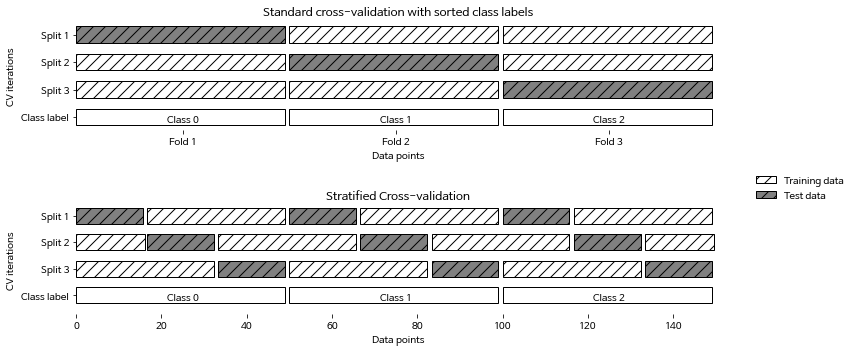

In [9]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
# cv 매개변수에 교차 검증 분할기를 전달 -> 데이터 분할을 제어
# KFold <- 기본 k겹 교차 검증 재현

from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)
print("교차 검증 점수 : ", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :  [1.         1.         0.86666667 0.93333333 0.83333333]


In [11]:
kfold = KFold(n_splits = 3)
print("교차 검증 점수 : ", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :  [0. 0. 0.]


In [12]:
# 데이터를 섞어서 샘플의 순서를 랜덤하게 바꿈 (KFold 의 shuffle = True)
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("교차 검증 점수 : ", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :  [0.98 0.96 0.96]


In [13]:
# 폴드 하나에 샘플 하나가 있는 k겹 교차 검증
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("교차 검증 분할 횟수 : ", len(scores))
print("평균 정확도 : {:.2f}" .format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


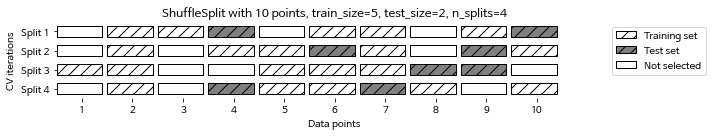

In [14]:
# 임의 분할 교차 검증 : train set, test set, split 횟수를 독립적으로 조정
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수 :\n", scores)

교차 검증 점수 :
 [0.97333333 0.96       0.97333333 0.94666667 0.94666667 0.98666667
 0.97333333 0.97333333 0.94666667 0.92      ]


In [16]:
# 그룹별 교차 검증 -> train set와 test set에 서로 다른 그룹이 들어가도록 함
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 12, random_state = 0)
groups = [0, 0,0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups = groups, cv = GroupKFold(n_splits = 3))
print("교차 검증 점수 :\n", scores);

교차 검증 점수 :
 [0.75       0.6        0.66666667]


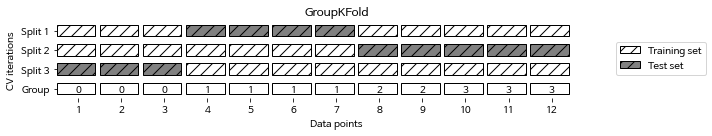

In [17]:
mglearn.plots.plot_group_kfold()

##5.1.4 반복 교차 검증

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state = 42)
scores = cross_val_score(logreg, iris.data, iris.target, cv = rskfold)
print("교차 검증 점수 :\n", scores)
print("교차 검증 평균 점수 : {:.2f}" .format(scores.mean()))

교차 검증 점수 :
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수 : 0.96


## 5.2 그리드 서치

In [19]:
# 가능한 매개변수의 모든 조합을 시도
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("train set size : {}, test set size : {}" .format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if(score > best_score):
            best_score = score
            best_parameters = {'gamma' : gamma, 'C' : C}
print("best score : {:.2f}" .format(best_score))
print("best parameters : ", best_parameters)

train set size : 112, test set size : 38
best score : 0.97
best parameters :  {'gamma': 0.001, 'C': 100}


## 5.2.2 매개변수 과대적합과 검증 세트

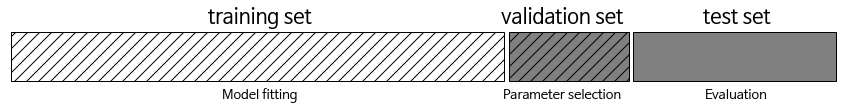

In [20]:
# 평가를 위해서 모델을 만들 때 사용하지 않은 독립된 데이터 세트가 필요
mglearn.plots.plot_threefold_split()

In [21]:
# 데이터 셋을 훈련 세트, 검증 세트, 테스트 세트 3개로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)

print("훈련 세트의 크기 : {}, 검증 세트의 크기 : {}, 테스트 세트의 크기 {}" .format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if(score > best_score):
            best_score = score
            best_parameters = {'gamma' : gamma, 'C' : C}

# 최종 평가에 사용하는 테스트 세트를 분리해 유지해야함!
svm = SVC(**best_parameters).fit(X_trainval, y_trainval)
print("best score : {:.2f}" .format(best_score))
print("best parameters : ", best_parameters)
print("최적 매개변수의 test set에서의 점수 : {:.2f}" .format(svm.score(X_test, y_test)))

훈련 세트의 크기 : 84, 검증 세트의 크기 : 28, 테스트 세트의 크기 38
best score : 0.96
best parameters :  {'gamma': 0.001, 'C': 100}
최적 매개변수의 test set에서의 점수 : 0.97


## 5.2.3 교차 검증을 위한 그리드 서치

In [22]:
# 교차 검증을 통해 훈련 세트와 검증 세트를 여러번 나눔
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)

        if(score > best_score):
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

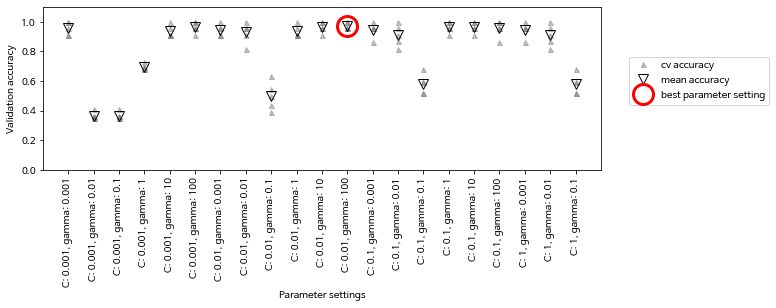

In [23]:
mglearn.plots.plot_cross_val_selection()

In [24]:
# 교차 검증 -> 그리드 서치의 최적의 매개변수를 찾음
# GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드 : \n", param_grid)

매개변수 그리드 : 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [25]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

# fit -> 매개변수 조합에 대해 교차검증을 수행
grid_search.fit(X_train, y_train)

print("test set score : {:.2f}" .format(grid_search.score(X_test, y_test)))
print("최적의 매개변수 : ", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}" .format(grid_search.best_score_))

test set score : 0.97
최적의 매개변수 :  {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97


In [27]:
# 전체 훈련세트를 통해 학습한 모델
print("최고 성능 모델 :\n", grid_search.best_estimator_)

최고 성능 모델 :
 SVC(C=10, gamma=0.1)


In [28]:
# 교차 검증의 결과로 검색을 확장해나감
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.004254,0.005399,0.009951,0.004953,0.005275
std_fit_time,0.002584,0.003522,0.004036,0.003921,0.002174
mean_score_time,0.001889,0.002913,0.002912,0.000854,0.00209
std_score_time,0.001961,0.001847,0.003605,0.000203,0.002399
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


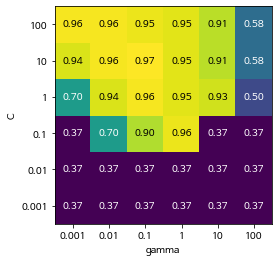

In [29]:
# 히트맵으로 시각화
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', yticklabels = param_grid['C'], cmap = "viridis")

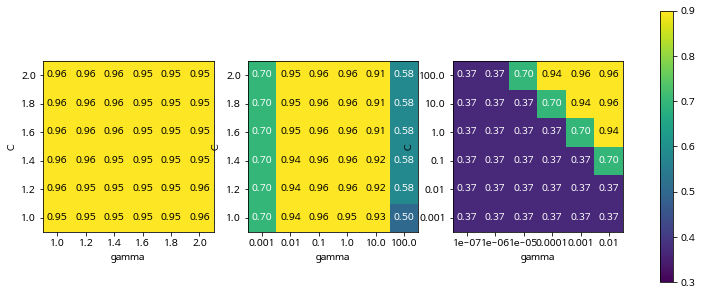

In [30]:
# 매개변수의 탐색 범위가 중요 -> 처음에는 넓게

fig, axes = plt.subplots(1, 3, figsize = (13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'],
        yticklabels = param_grid['C'], cmap = "viridis", ax = ax, vmin = 0.3, vmax = 0.9)
    
plt.colorbar(scores_image, ax = axes.tolist())

In [31]:
# SVC에서는 어떤 커널을 사용하냐에 따라 확인해야하는 매개변수 조합이 달라짐
param_grid = [
    {'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
]
print("그리드 목록 :\n", param_grid)

그리드 목록 :
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [32]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)
print("최적의 파라미터 : ", grid_search.best_params_)
print("최적의 교차 검증 점수 : {:.2f}" .format(grid_search.best_score_))

최적의 파라미터 :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최적의 교차 검증 점수 : 0.97


In [33]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.002721,0.002173,0.003354,0.001751,0.007033,0.001827,0.001685,0.001717,0.001661,0.001764,0.001794,0.00207,0.010029,0.004395,0.00157,0.001282,0.001651,0.001797,0.001698,0.001413,0.001328,0.001547,0.001894,0.002299,0.002034,0.001095,0.003858,0.007657,0.002321,0.015658,0.00226,0.001436,0.001198,0.004479,0.001977,0.00215,0.001721,0.003033,0.001846,0.001133,0.001095,0.001166
std_fit_time,0.001612,0.000832,0.003381,0.000105,0.00267,0.000228,0.000107,0.000109,0.000081,0.000146,0.000029,0.000121,0.01111,0.005237,0.000291,0.000113,0.000052,0.000085,0.000031,0.000125,0.000435,0.000368,0.000101,0.000102,0.001341,0.000109,0.005484,0.005553,0.000156,0.004144,0.002181,0.000451,0.000155,0.003734,0.00003,0.000066,0.000267,0.00287,0.00124,0.000056,0.000103,0.000071
mean_score_time,0.00232,0.000736,0.000709,0.000697,0.001109,0.001458,0.000743,0.000691,0.00072,0.001323,0.0008,0.001082,0.005871,0.001258,0.000672,0.000592,0.000696,0.000683,0.002582,0.000992,0.000554,0.000583,0.001779,0.002203,0.000658,0.000546,0.001443,0.002052,0.003894,0.002115,0.000649,0.003284,0.002065,0.000695,0.000714,0.00078,0.001,0.000722,0.000564,0.000525,0.000492,0.000477
std_score_time,0.002939,0.000073,0.000072,0.00003,0.000326,0.001467,0.000064,0.000035,0.000073,0.001018,0.000103,0.000571,0.006372,0.000912,0.00004,0.000073,0.000053,0.000045,0.003725,0.000655,0.000068,0.000063,0.002289,0.002777,0.000071,0.000081,0.001654,0.0028,0.0062,0.002114,0.000075,0.005376,0.00295,0.000105,0.000036,0.000022,0.000775,0.000192,0.000045,0.00004,0.000043,0.000009
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'line

In [34]:
# 중첩 교차 검증 : train set과 test set을 한 번만 나누는 문제를 해결
# 주어진 모델이 얼마나 잘 일반화 되었는지 확인할 때 사용

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
score = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print("교차 검증 점수 : ", score)
print("교차 검증 평균 점수 : {:.2f} " .format(score.mean()))

교차 검증 점수 :  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수 : 0.98 


In [35]:
# 바깥쪽 루프와 안쪽 루프에서 모두 교차 검증을 하므로 비용이 매우 큼

# 중첩교차검증 직접 구현
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 바깥 루프 : train set과 test set을 나눔
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            # 안쪽 루프 : train set과 valid set으로 나눔
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [36]:
# 함수 적용해보기
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [37]:
# 교차 검증과 그리드 서치 병렬화

from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [ {'kernel' : ['rbf'], 'C' : loguniform(0.001, 100), 'gamma' : loguniform(0.001, 100)},
               {'kernel' : ['linear'], 'C' : loguniform(0.001, 100)}]

# RandomizedSearchCV : 매개변수를 무작위로 선택해 조사
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter = 20, random_state = 42, n_jobs = -1)

rand_search.fit(X_train, y_train)
print("최적의 파라미터 : ", rand_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}" .format(rand_search.best_score_))

최적의 파라미터 :  {'C': 1.7965626423790642, 'kernel': 'linear'}
최고 교차 검증 점수 : 0.97


In [38]:
# HalvingGridSearchCV : 모든 파라미터 조합에 대해 제한된 자원으로 실행 -> 가장 좋은 후보를 골라 더 많은 자원 투여

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [{'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]

halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose = 1, random_state = 42, n_jobs = -1)
halv_search.fit(X_train, y_train)
print()
print("최적의 파라미터 : ", halv_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}" .format(halv_search.best_score_))

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits

최적의 파라미터 :  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.97


## 5.3 평가 지표와 측정

## 5.3.2 이진 분류의 평가 지표

In [39]:
# 불균형 데이터셋 -> 정확도가 항상 좋은 지표는 x
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

# 모든 답을 false로 내놓는 모델이 90%의 정확도를 보임
print("예측된 레이블의 레이블 : ", np.unique(pred_most_frequent))
print("테스트 점수 : {:.2f}" .format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블 :  [False]
테스트 점수 : 0.90


In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
print("test score : {:.2f}" .format(tree.score(X_test, y_test)))

test score : 0.92


In [41]:
dummy = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
print("dummy 점수 : {:.2f}" .format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1, max_iter = 1000).fit(X_train, y_train)
print("logreg 점수 : {:.2f}" .format(logreg.score(X_test, y_test)))

dummy 점수 : 0.81
logreg 점수 : 0.98


In [43]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

pred_logreg = logreg.predict(X_test)
confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬 : \n", confusion)

오차 행렬 : 
 [[402   1]
 [  6  41]]


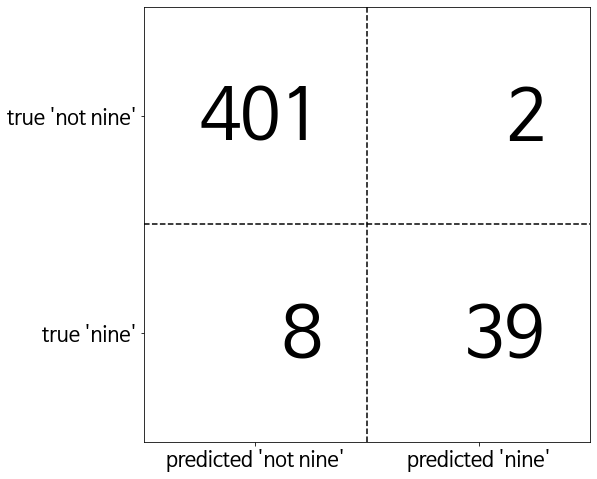

In [45]:
mglearn.plots.plot_confusion_matrix_illustration()

In [52]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
pred_dummy = dummy.predict(X_test)
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리 : \n")
pred_tree = tree.predict(X_test)
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀 : \n")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[354  49]
 [ 37  10]]

결정 트리 : 

[[390  13]
 [ 24  23]]

로지스틱 회귀 : 

[[402   1]
 [  6  41]]


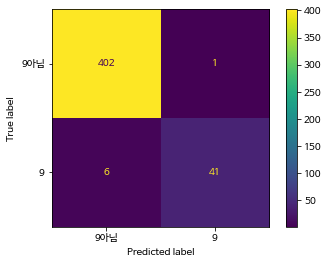

In [53]:
# 오차행렬의 정보 요약
from sklearn.metrics import ConfusionMatrixDisplay

# from_estimator
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels = ['9아님' , '9'])
plt.show()

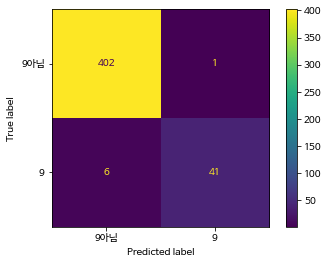

In [54]:
#from_predictions
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels = ['9아님', '9'])